# Prodigy Infotech Data Science Internship

## Task 2

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

#### 1. Import Required Libraries and Load the Dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the dataset
titanic_df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Initial Data Overview

In [3]:
# Check for missing values and data types
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Descriptive statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 3. Handle Missing Values

In [7]:
# Fill missing Age values with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Fill missing Embarked values with the most common port
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [11]:
# Drop the Cabin column (too many missing values)
titanic_df.drop(columns=['Cabin'], inplace=True)

In [12]:
# Verify missing values have been handled
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### 4. Convert Data Types

In [13]:
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')
titanic_df['Survived'] = titanic_df['Survived'].astype('category')

### Exploratory Data Analysis (EDA)

#####  Univariate Analysis

#### 1. Survival Distribution:

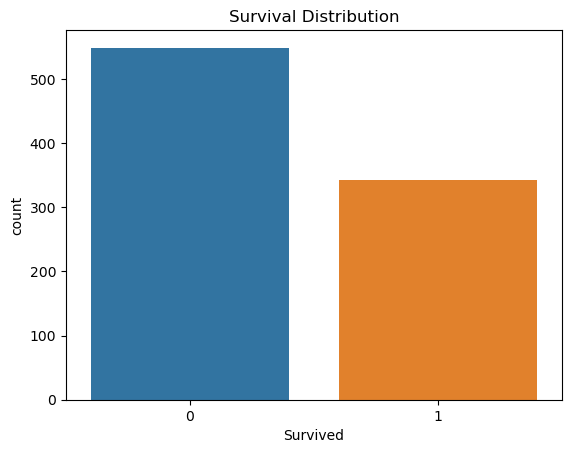

In [17]:
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Distribution')
plt.show()

#### 2. Age Distribution:

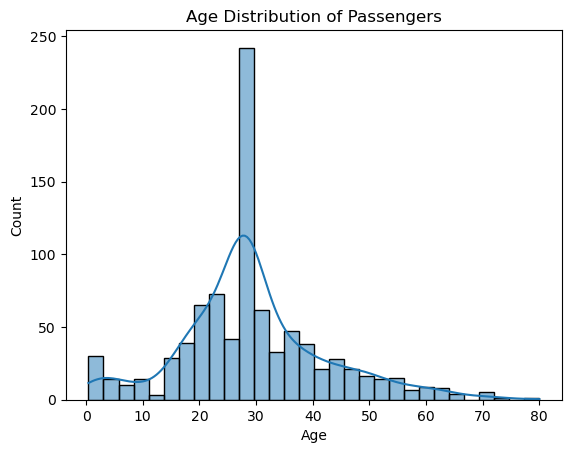

In [18]:
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

#### 3. Fare Distribution:

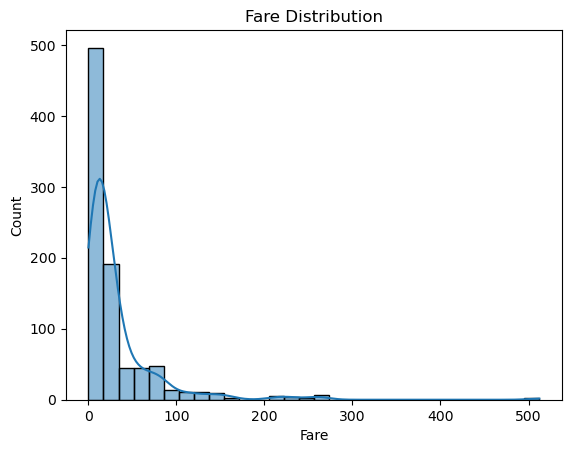

In [19]:
sns.histplot(titanic_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

##### Bivariate Analysis

#### 1. Survival Rate by Class (Pclass):

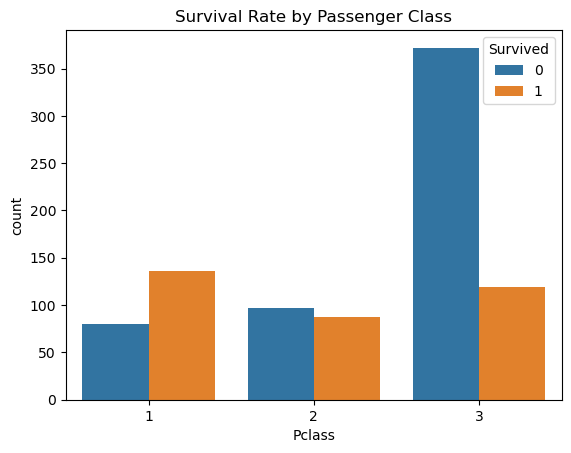

In [20]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

#### 2. Survival Rate by Gender:

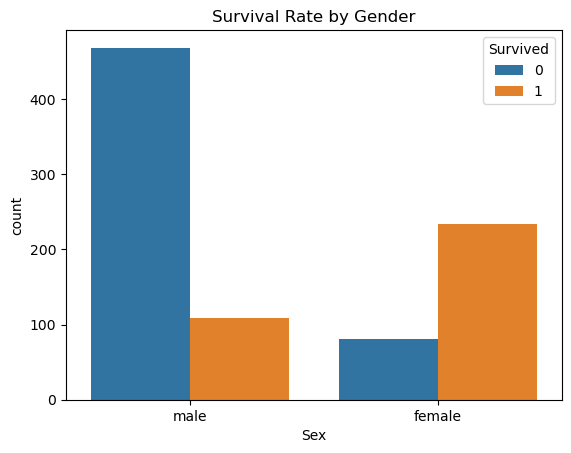

In [21]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

#### 3. Age vs. Survival:

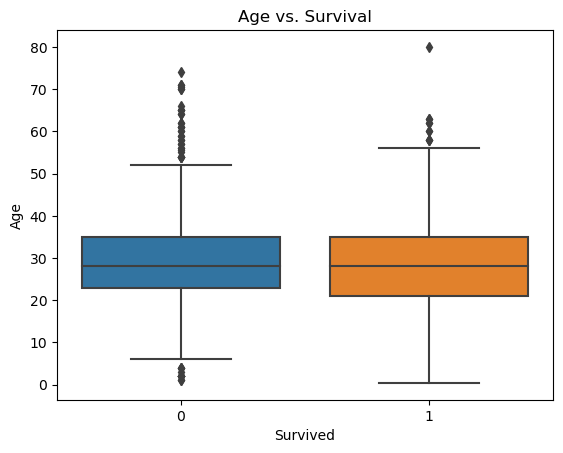

In [22]:
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age vs. Survival')
plt.show()

##### Multivariate Analysis

#### 1. Survival Rate by Gender and Class:

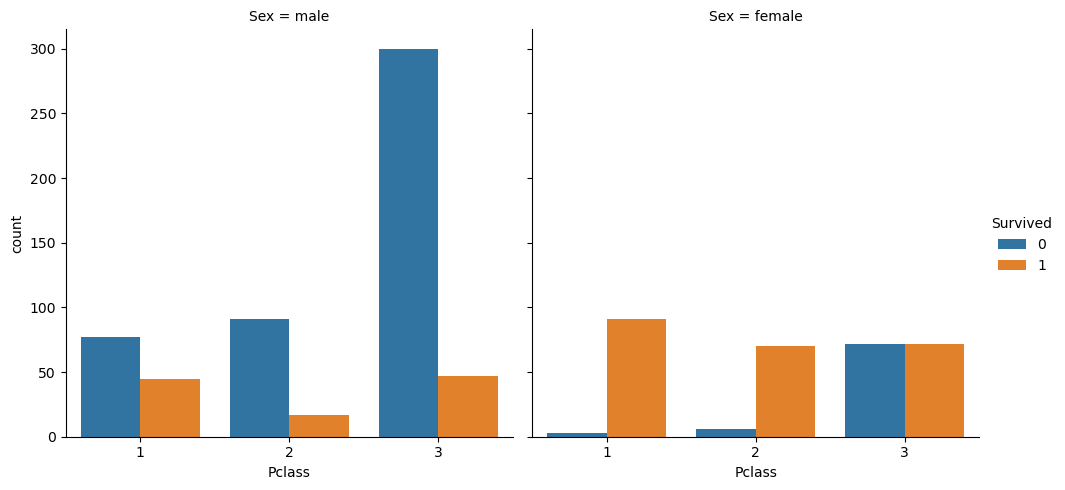

In [23]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=titanic_df)
plt.show()

#### 2. Correlation Heatmap (Numerical Variables)

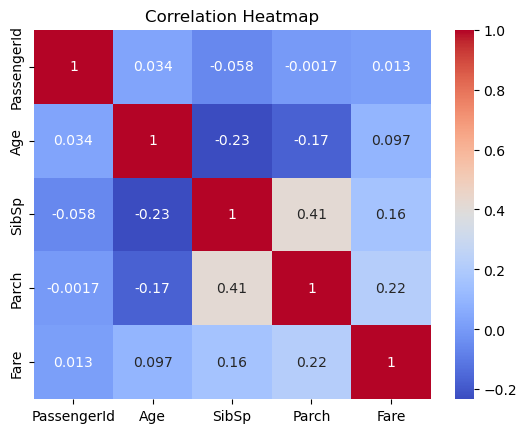

In [26]:
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Key Insights from the Titanic Dataset EDA:

1. **Survival Distribution**:
   - Around 38% of passengers survived, while 62% did not.
   
  
2. **Age Distribution**:
   - The age distribution is right-skewed, with a higher concentration of younger passengers.
   
  
3. **Survival by Class**:
   - Passengers in 1st class had the highest survival rate, followed by 2nd class, while 3rd class passengers had the lowest survival rate.
   
  
4. **Survival by Gender**:
   - Females had a significantly higher survival rate compared to males, likely due to the 'women and children first' policy during evacuation.
   
  
5. **Age and Survival**:
   - Younger passengers tended to survive more frequently than older ones, with infants and children showing higher survival rates.
   
  
6. **Fare**:
   - Passengers who paid higher fares were more likely to survive, indicating that wealthier passengers had better access to lifeboats and other safety measures.
   
  
7. **Survival by Gender and Class**:
   - Female passengers in 1st class had the highest survival rate, whereas 3rd class males had the lowest.


Name- Aman Choudhary

Email address- amanchoudhary11189.ac@gmail.com

linkedin Profile- https://www.linkedin.com/in/aman-choudhary-61a9361a0/

Portfolio- https://amanchoudhary1997.github.io/amanchoudhary.github.io/